In [444]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

In [ ]:
file_path = '../data/helper/df_repos_metadata_star_no_range.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

In [446]:
df = pd.DataFrame(data=loaded_data)

In [447]:
#df.head(3)

In [448]:
#df.info()

### analyse if repo is in English

In [449]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

In [450]:
df['language_spoken'] = df['description'].apply(detect_language)

In [451]:
len(df[df['language_spoken'] == 'en'])

2

In [452]:
df = df[df['language_spoken'] == 'en']

In [459]:
df

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score,language_spoken
0,54346799,public-apis,public-apis/public-apis,https://github.com/public-apis/public-apis,A collective list of free APIs,https://api.github.com/repos/public-apis/publi...,https://api.github.com/repos/public-apis/publi...,2016-03-20T23:49:42Z,2025-04-13T16:31:30Z,2024-10-31T19:50:02Z,...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[api, apis, dataset, development, free, list, ...",public,35510,442,335534,master,1.0,en
1,54346799,public-apis,public-apis/public-apis,https://github.com/public-apis/public-apis,A collective list of free APIs,https://api.github.com/repos/public-apis/publi...,https://api.github.com/repos/public-apis/publi...,2016-03-20T23:49:42Z,2025-04-13T16:31:30Z,2024-10-31T19:50:02Z,...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[api, apis, dataset, development, free, list, ...",public,35510,442,335534,master,1.0,en


### analyse numeric values

In [453]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0
25%,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0
50%,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0
75%,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0
max,54346799.0,5030.0,335534.0,335534.0,35510.0,442.0,35510.0,442.0,335534.0,1.0


In [454]:
#df['stargazers_count'].value_counts().sort_index(ascending=False)

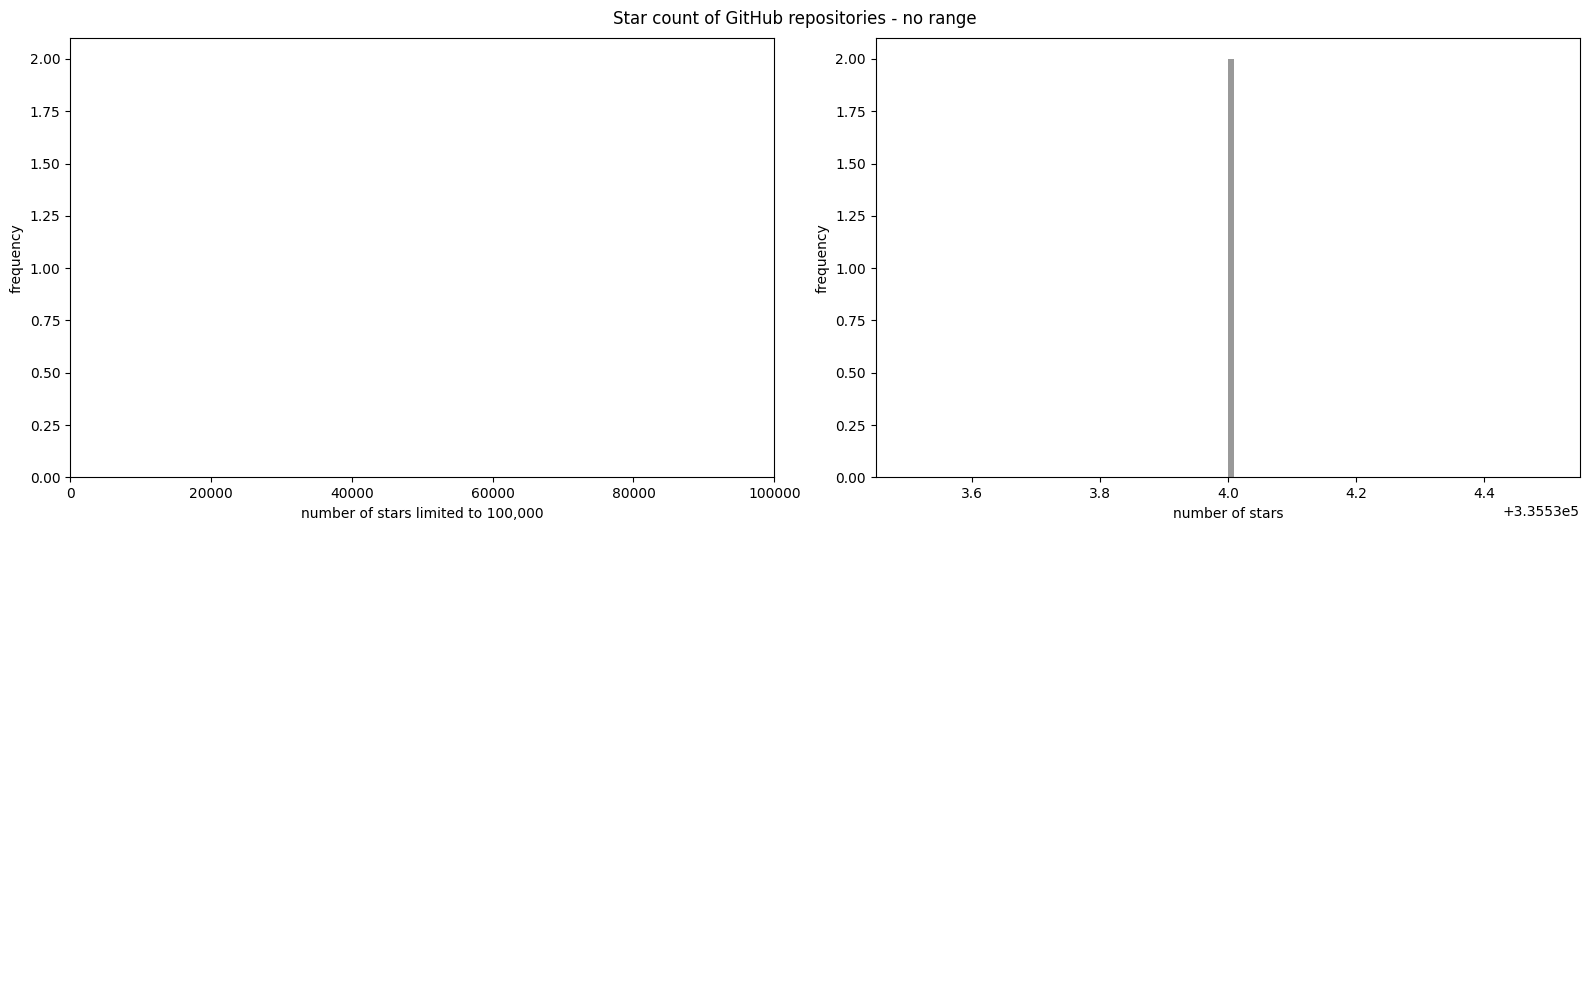

In [455]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=500)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories - no range')
# format of interval between plots
plt.tight_layout()

plt.show()

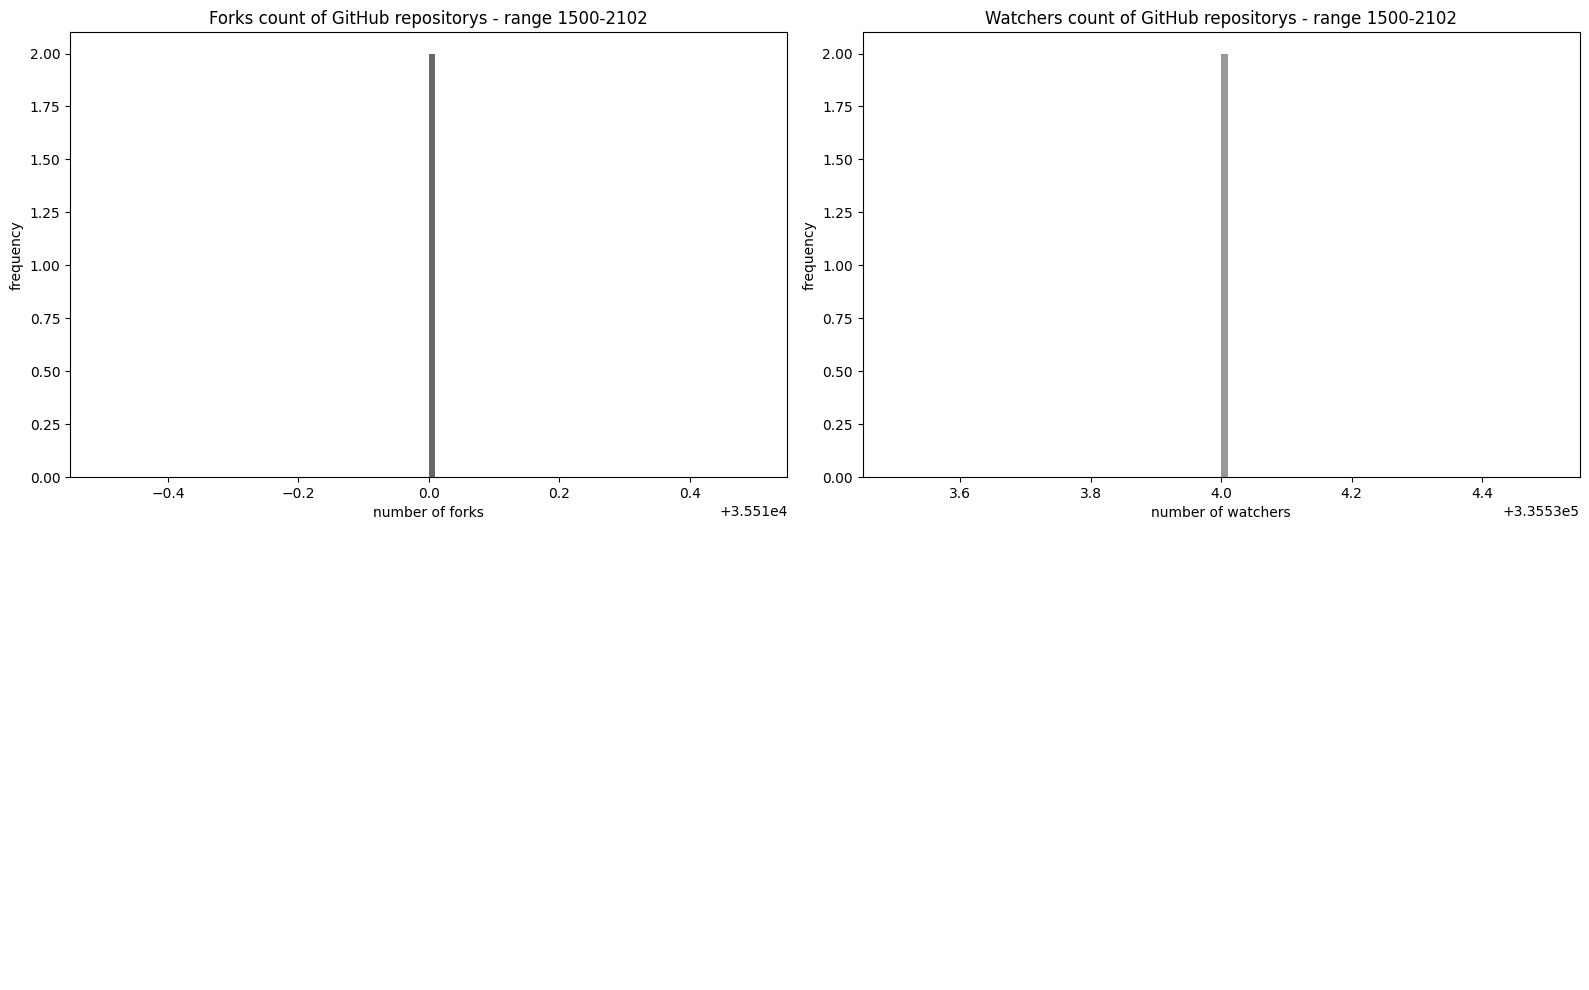

In [456]:
# number of forks & watchers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['forks_count'], color='0.4', bins=100)
ax[0,1].hist(df['watchers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
ax[0,0].set_title('Forks count of GitHub repositorys - range 1500-2102')
ax[0,1].set_title('Watchers count of GitHub repositorys - range 1500-2102')

# lable axis x
ax[0,0].set_xlabel('number of forks')
ax[0,1].set_xlabel('number of watchers')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
#ax[0,0].set_xlim(0, 100000)

# fig.suptitle('Forks count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

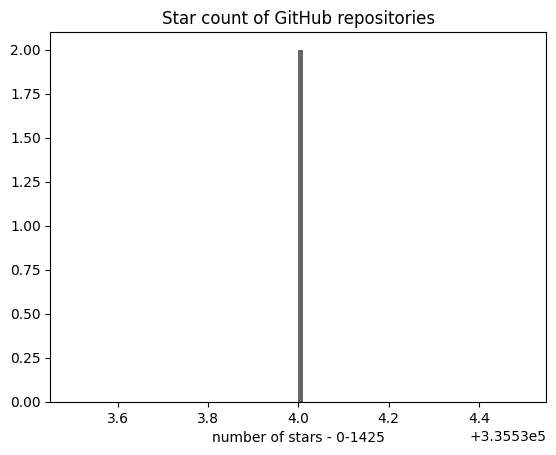

In [457]:
plt.hist(df['stargazers_count'], color='0.4', bins=100)
plt.xlabel('number of stars - 0-1425')
plt.title('Star count of GitHub repositories')

plt.show()

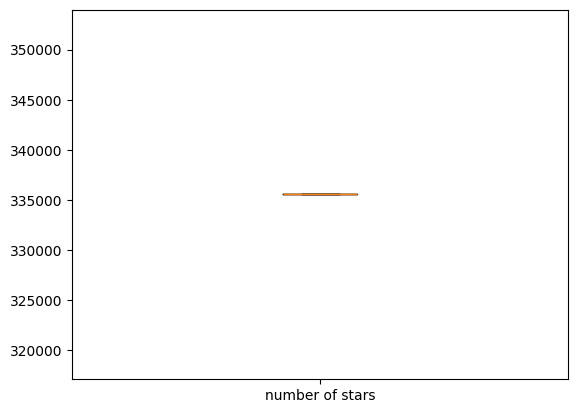

In [458]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()